## Introduction to Deep Learning in Python

**Course Structure:**
* Chapter 1. Basics of deep learning and neural networks
* Chapter 2. Optimizing a neural network with backward propagation
* Chapter 3. Building deep learning models with keras
* Chapter 4. Fine-tuning keras models

### CHAPTER 1. Basics of deep learning and neural networks

#### Part 1.1 Introduction to deep learning


**Linear regression VS. Deep Learning / Neural Networks:**
* Linear regression is the sum of individual parts, it *lacks interaction*
* Neural networks account for interactions very well using *hidden layers*
* Deep learning uses powerful neural networks and has applications in:
    * Text
    * Images
    * Videos
    * Audio
    * Source code
 

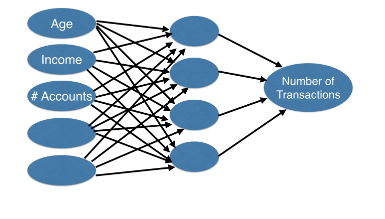

In [1]:
# display interaction
from IPython import display

display.Image("Images/15_interaction.PNG")

#### Part 1.2 Forward propagation

**Forward propagation algorithm:**
* Each forward propagation has a weight value
* Move forward by multiply - add process (Dot product)
* Forward propagation for one data point at a time
* Output is the prediction for that data point

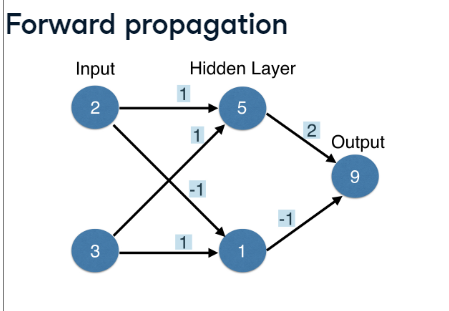

In [2]:
# display forward propagation example
from IPython import display

display.Image("Images/15_forward_prop.PNG")

In [3]:
# Code for part 1.2

# coding the forward propagation algorithm
import numpy as np

# initialize inputs and weights
input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]),
           'node_1': np.array([4, -5]),
           'output': np.array([2, 7])}

# calculate node 0 value:
node_0_value = (input_data * weights['node_0']).sum()

# calculate node 1 value:
node_1_value = (input_data * weights['node_1']).sum()

# put node values into hidden layer array:
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# calculate output:
output = (hidden_layer_outputs * weights['output']).sum()
print(output) # -39

-39


#### Part 1.3 Activation functions

* Apply activation functions in hidden layer to *maximize* neural networks predictive power
* Activation functions allows the model to capture *non-linearity*
* Activation functions applied to the *input* and transform the *output*
* Popular activation functions:
1. ReLU (Rectified Linear Activation)

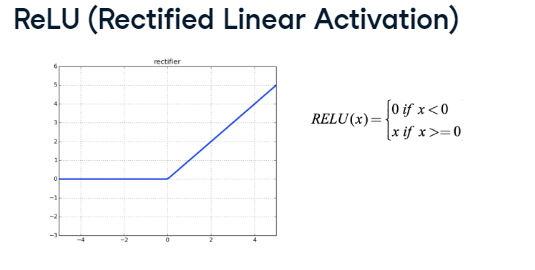

In [4]:
# display ReLU

from IPython import display

display.Image("Images/15_relu.PNG")

In [5]:
# Code for part 1.3

# the Rectified Linear Activation Function (ReLU)
import numpy as np

# create function 'relu'
def relu(input):
    output = max(0, input)
    return (output)

# get input data and weights
input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]),
           'node_1': np.array([4, -5]),
           'output': np.array([2, 7])}

# calculate node 0
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# calculate node 1
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# calculate hidden layer output
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# calculate model output
model_output = (hidden_layer_outputs * weights['output']).sum()
print(model_output) #52

52


In [6]:
# Code for part 1.3 (continue)

# applying the network to many observations/ rows of data
import numpy as np

# get input data and weights
input_data = [np.array([3, 5]), 
              np.array([ 1, -1]), 
              np.array([0, 0]), 
              np.array([8, 4])]
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}


# define function 
def predict_with_network(input_data_row, weights):
    
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    return (model_output)

# create empty list to store prediction results
results = []

for input_data_row in input_data:
    results.append(predict_with_network(input_data_row, weights))
    
print(results)


[52, 63, 0, 148]


#### Part 1.4 Deeper networks

* The modern deep learning models have *more than one* successive hidden layers
* Deep learning is sometimes called **representation learning**
* Deep learning networks internally build *representation of patterns* in the data
* Networks partially replace the need for feature engineering
* Model doesn't need to specify the interactions
* When you train the model, the neural network gets **weights** that find the *relevant patterns* to make *better predictions*

In [7]:
# Code for part 1.4

# multi-layer neural networks
import numpy as np

# get inputs data and weights
input_data = np.array([3, 5])
weights = {'node_0_0': np.array([2, 4]),
           'node_0_1': np.array([ 4, -5]),
           'node_1_0': np.array([-1,  2]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([2, 7])}
# create function
def predict_with_network(input_data):
    # calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # put node values into array
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # put node values into array
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # calculate model output
    model_output = (hidden_1_outputs * weights['output']).sum()
    return(model_output)

# get output
output = predict_with_network(input_data)
print(output) #182

182


### CHAPTER 2. Optimizing a neural network with backward propagation

#### Part 2.1 The need for optimization

* The structure of neural networks *does not guarantee* good predictions
* The **value of weights** play an important role in forward propagation algorithm
* Making accurate predictions gets harder with more points

**Loss Function:**
* **Loss function** is used to aggregate errors and measure the model's predictive performance
* The lower loss function is, the better
* Goal: Find the weights that give the lowest value of loss function
* The most common algorithm to do this is called **Gradient Descent** algorithm

**Gradient Descent algorithm steps:**
* Start with a random point
* Until you are on somewhere flat:
    * Find the slope
    * Take a step downhill




In [8]:
# Code for part 2.1

# code how weight changes affect accuracy
import numpy as np

# get inputs data and weights
input_data = np.array([0, 3])
weights_0 = {'node_0': [2, 1],
           'node_1': [1, 2],
           'output': [1, 1]}

# set actual value
target_actual = 3

# make predictions with inputs data and weights
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)

    return(model_output)

model_output_0 = predict_with_network(input_data, weights_0)
error_0 = target_actual - model_output_0

# try another weight: weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
             }

model_output_1 = predict_with_network(input_data, weights_1)
error_1 = target_actual - model_output_1

# print two errors
print(error_0) #-6
print(error_1) #0

# change of weights in weights_1 help to make better predictions

-6
0


In [9]:
# scaling up to multiple data points
import numpy as np
from sklearn.metrics import mean_squared_error as mse

# get inputs data and two different weights set
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
weights_0 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1, 2]),
             'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1. , 1.5]),
             'output': np.array([1. , 1.5])}
target_actuals = [1, 3, 5, 7]

# create empty model outputs
model_output_0 = []
model_output_1 = []

# loop over input data
for row in input_data:
    model_output_0.append(predict_with_network(row, weights_0))
    model_output_1.append(predict_with_network(row, weights_1))

# calculate MSE for two outputs
mse_0 = mse(target_actuals, model_output_0)
mse_1 = mse(target_actuals, model_output_1)
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


#### Part 2.2 Gradient descent (CONCEPTUAL)(IMPORTANT)

* With gradient descent, you repeatedly:
    * Found a slope
    * Captured how loss function changes as a weight changes
    * Change a weight to get to a lower point
* Until you couldn't go downhill anymore

* If the slope is **positive**:
    * Going to opposite means moving to lower numbers
    * Subtract the slope from current number
    * But a too big step might lead us astray
    * Update weight by subtracting **learning rate** * slope
        
**Slope calculation:**
* We need to multiply:
    1. Slope of loss function (with respect to) value at the node we feed into (output node)
    2. The value of node that feeds into our weight (input node)
    3. Slope of activation function (with respect to) value we feed into (output node)
    
* Example: (shown in the picture below)
$$ 3 * 2 = 6 (Actual Target Value = 10)$$
* Slope of mean-squared loss function:
$$ 2(Predicted Value - Actual Value) = 2 Error$$
$$ 2*(-4)$$
* Value of node we are feeding from:
$$3$$
* Slope of activation function: (none for this example)
* Final result:
$$2 * (-4) *3 = -24$$

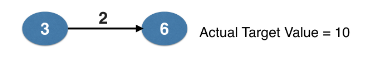

In [1]:
# display slope calculation example
from IPython import display

display.Image("Images/15_slope_example.PNG")

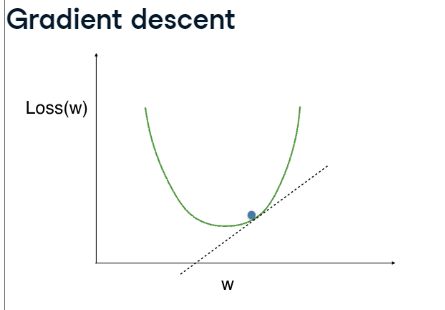

In [2]:
# display gradient descent
from IPython import display

display.Image("Images/15_gradient_descent.PNG")

In [3]:
# Code for part 2.2

# calculating slopes
import numpy as np

# get inputs data and weights and target
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

# calculate preds
preds = (input_data * weights).sum()

# calculate error
error = preds - target

# calculate slope
slope = input_data * error * 2
print(slope)

[14 28 42]


In [4]:
# Code for part 2.2 (continue)

# improving model weights

# set learning rate
learning_rate = 0.01

# update weights
weights_updated = weights - learning_rate * slope

# update preds
preds_updated = (input_data * weights_updated).sum()

# updated error
error_updated = preds_updated - target
print('Old Error: {}'.format(error))
print('New Error: {}'.format(error_updated))


Old Error: 7
New Error: 5.04


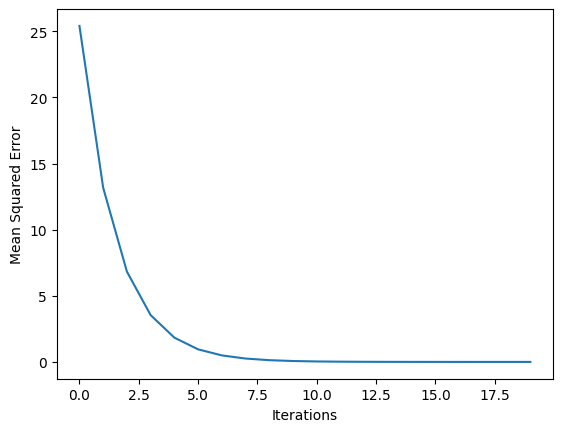

In [5]:
# Code for part 2.2 (continue)

# making multiple updates to weights
import numpy as np
import matplotlib.pyplot as plt

# create functions to get error, slope, and mse separately
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

# get input data, target, weights
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

# create empty list to store updates
n_updates = 20
mse_hist = []

# loop over 
for i in range(n_updates):
    slope = get_slope(input_data, target, weights)
    weights = weights - 0.01 * slope
    mse = get_mse(input_data, target, weights)
    mse_hist.append(mse)
    
# plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

# note how the mse decreased through iterations

#### Part 2.3 Backpropagation (CONCEPTUAL)(IMPORTANT)

**Back-propagation:**
* It takes the error from the output layer
* Propagate it backward towards the input layer
* It goes back one layer at a time
* It needs prediction and error at the most beginning
* Forward propagation happens before back-propagation

**Process:**
* Estimate the slope of loss function (with respect to) each weight
* Gradients for weights is product of:
    1. Slope of loss function (with respect to) node it feeds into (output node)
    2. Node value feeding into that weight (input node)
    3. Slope of activation function (with respect to) node it feeds into (output node)    
* Need to keep track of the slopes of loss function
* Slope of node values are the sum of the slopes for all weights that come out of them 

In [8]:
# display back-propagation
from IPython import display

display.Image("Images/15_back_prop.PNG")

#### Part 2.4 Backpropagation in practice

* Calculate back-propagation with one example as follows: 

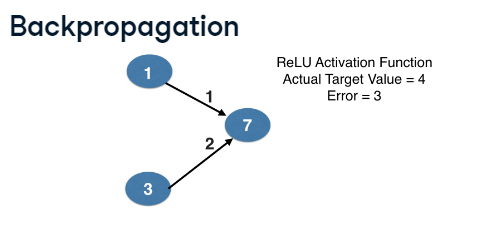

In [2]:
# display example part 1
from IPython import display

display.Image("Images/15_back_example_1.PNG")

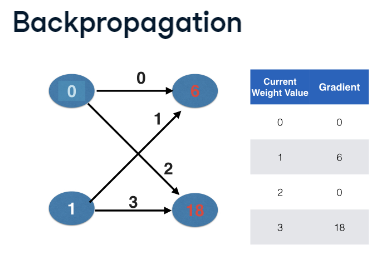

In [1]:
# display example part 2
from IPython import display

display.Image("Images/15_back_example_2.PNG")

### CHAPTER 3. Building deep learning models with keras

#### Part 3.1 Creating a keras model

**Model building steps:**
1. Specify architecture (we use **Sequential** and **Dense** here)
2. Compile the model
3. Fit the model
4. Predict

 

In [7]:
# Code for part 3.1 

# understanding your data
import pandas as pd

# load data
wage_per_hour = pd.read_csv('15_datasets/hourly_wages.csv')
print(wage_per_hour.head())
print(wage_per_hour.describe())


   wage_per_hour  union  education_yrs  experience_yrs  age  female  marr  \
0           5.10      0              8              21   35       1     1   
1           4.95      0              9              42   57       1     1   
2           6.67      0             12               1   19       0     0   
3           4.00      0             12               4   22       0     0   
4           7.50      0             12              17   35       0     1   

   south  manufacturing  construction  
0      0              1             0  
1      0              1             0  
2      0              1             0  
3      0              0             0  
4      0              0             0  
       wage_per_hour       union  education_yrs  experience_yrs         age  \
count     534.000000  534.000000     534.000000      534.000000  534.000000   
mean        9.024064    0.179775      13.018727       17.822097   36.833333   
std         5.139097    0.384360       2.615373       12.379

In [6]:
# specifying a model
from keras.layers import Dense
from keras.models import Sequential

# split into predictors and target
predictors = wage_per_hour.drop(['wage_per_hour'], axis=1).to_numpy()
target = wage_per_hour['wage_per_hour'].to_numpy()

# get number of columns: n_cols
n_cols = predictors.shape[1]

# set up the model
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
print(model)

#### Part 3.2 Compiling and fitting a model

**Model building steps:**
1. Specify architecture 
2. Compile the model 
    (specify the **optimizer**, **loss function**)
    (we use **'adam'** and **'mean-squared-error'** here for regression problems) 
3. Fit the model 
    (applying back-propagation and gradient descent to **update weights**)
    (scaling data before can improve model performance)
4. Predict


In [3]:
# Code for part 3.2

# compiling the model
import pandas as pd
from tensorflow import keras
from keras.layers import Dense

# get the data
wage_per_hour = pd.read_csv('15_datasets/hourly_wages.csv')
predictors = wage_per_hour.drop(['wage_per_hour'], axis=1).to_numpy()
target = wage_per_hour['wage_per_hour'].to_numpy()

# get number of columns: n_cols
n_cols = predictors.shape[1]

# specify the model
model = keras.models.Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print("Loss function: " + model.loss)

# fit the model
model.fit(predictors, target)


Loss function: mean_squared_error


#### Part 3.3 Classification models

**Different things on classification models:**
* Loss function -> **'categorical_crossentropy'** instead of *'mean_squared_error'*
* Add metrics -> *['accuracy']*
* Output layer has separate node for each possible outcome and activation function -> *'softmax'* 


In [1]:
# Code for part 3.3 

# last steps in classification models
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# get data and features
df = pd.read_csv('15_datasets/titanic.csv')
predictors = df.drop(['survived'], axis=1).to_numpy()
n_cols = predictors.shape[1]

# convert the target to categorical: target
target = tf.keras.utils.to_categorical(df.survived)

# set up model
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(keras.layers.Dense(2, activation='softmax'))

# compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(predictors, target)


#### Part 3.4 Using models

**Ways to use the model:**
1. Save -> *'model.save('model_file.h5')'*
2. Reload -> *'loae_model('model_file.h5')'*
3. Make predictions -> *'.predict(data_to_predict_with)'*

In [5]:
# Code for part 3.4 

# making predictions
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense

# get data
df = pd.read_csv('15_datasets/titanic.csv')
predictors = df.drop(['survived'], axis=1).to_numpy()
n_cols = predictors.shape[1]
target = tf.keras.utils.to_categorical(df.survived)

# build a model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target)
          
# make pred_data
pred_data = np.array([[  2.      ,  34.      ,   0.      ,   0.      ,  13.      ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  31.      ,   1.      ,   1.      ,  26.25    ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  11.      ,   1.      ,   2.      , 120.      ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,   0.42    ,   0.      ,   1.      ,   8.5167  ,
                         1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  27.      ,   0.      ,   0.      ,   6.975   ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  31.      ,   0.      ,   0.      ,   7.775   ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  39.      ,   0.      ,   0.      ,   0.      ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  18.      ,   0.      ,   0.      ,   7.775   ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  39.      ,   0.      ,   0.      ,  13.      ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  33.      ,   1.      ,   0.      ,  53.1     ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  26.      ,   0.      ,   0.      ,   7.8875  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  39.      ,   0.      ,   0.      ,  24.15    ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  35.      ,   0.      ,   0.      ,  10.5     ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,   6.      ,   4.      ,   2.      ,  31.275   ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  30.5     ,   0.      ,   0.      ,   8.05    ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  29.699118,   0.      ,   0.      ,   0.      ,
                         1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  23.      ,   0.      ,   0.      ,   7.925   ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  31.      ,   1.      ,   1.      ,  37.0042  ,
                         1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  43.      ,   0.      ,   0.      ,   6.45    ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  10.      ,   3.      ,   2.      ,  27.9     ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  52.      ,   1.      ,   1.      ,  93.5     ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  27.      ,   0.      ,   0.      ,   8.6625  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  38.      ,   0.      ,   0.      ,   0.      ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  27.      ,   0.      ,   1.      ,  12.475   ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,   2.      ,   4.      ,   1.      ,  39.6875  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  29.699118,   0.      ,   0.      ,   6.95    ,
                         1.      ,   1.      ,   0.      ,   1.      ,   0.      ],
                      [  3.      ,  29.699118,   0.      ,   0.      ,  56.4958  ,
                         1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,   1.      ,   0.      ,   2.      ,  37.0042  ,
                         1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  29.699118,   0.      ,   0.      ,   7.75    ,
                         1.      ,   1.      ,   0.      ,   1.      ,   0.      ],
                      [  1.      ,  62.      ,   0.      ,   0.      ,  80.      ,
                         0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
                      [  3.      ,  15.      ,   1.      ,   0.      ,  14.4542  ,
                         0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  2.      ,   0.83    ,   1.      ,   1.      ,  18.75    ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  29.699118,   0.      ,   0.      ,   7.2292  ,
                         1.      ,   1.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  23.      ,   0.      ,   0.      ,   7.8542  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  18.      ,   0.      ,   0.      ,   8.3     ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  39.      ,   1.      ,   1.      ,  83.1583  ,
                         0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  21.      ,   0.      ,   0.      ,   8.6625  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  29.699118,   0.      ,   0.      ,   8.05    ,
                         1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  32.      ,   0.      ,   0.      ,  56.4958  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  29.699118,   0.      ,   0.      ,  29.7     ,
                         1.      ,   1.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  20.      ,   0.      ,   0.      ,   7.925   ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  16.      ,   0.      ,   0.      ,  10.5     ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  30.      ,   0.      ,   0.      ,  31.      ,
                         0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  34.5     ,   0.      ,   0.      ,   6.4375  ,
                         1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  17.      ,   0.      ,   0.      ,   8.6625  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  42.      ,   0.      ,   0.      ,   7.55    ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  29.699118,   8.      ,   2.      ,  69.55    ,
                         1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  35.      ,   0.      ,   0.      ,   7.8958  ,
                         1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  2.      ,  28.      ,   0.      ,   1.      ,  33.      ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  29.699118,   1.      ,   0.      ,  89.1042  ,
                         0.      ,   1.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,   4.      ,   4.      ,   2.      ,  31.275   ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  74.      ,   0.      ,   0.      ,   7.775   ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,   9.      ,   1.      ,   1.      ,  15.2458  ,
                         0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  1.      ,  16.      ,   0.      ,   1.      ,  39.4     ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  44.      ,   1.      ,   0.      ,  26.      ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  18.      ,   0.      ,   1.      ,   9.35    ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  45.      ,   1.      ,   1.      , 164.8667  ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  51.      ,   0.      ,   0.      ,  26.55    ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  24.      ,   0.      ,   3.      ,  19.2583  ,
                         0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  29.699118,   0.      ,   0.      ,   7.2292  ,
                         1.      ,   1.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  41.      ,   2.      ,   0.      ,  14.1083  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  21.      ,   1.      ,   0.      ,  11.5     ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  48.      ,   0.      ,   0.      ,  25.9292  ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  29.699118,   8.      ,   2.      ,  69.55    ,
                         0.      ,   1.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  24.      ,   0.      ,   0.      ,  13.      ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  42.      ,   0.      ,   0.      ,  13.      ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  27.      ,   1.      ,   0.      ,  13.8583  ,
                         0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  1.      ,  31.      ,   0.      ,   0.      ,  50.4958  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  29.699118,   0.      ,   0.      ,   9.5     ,
                         1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,   4.      ,   1.      ,   1.      ,  11.1333  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  26.      ,   0.      ,   0.      ,   7.8958  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  47.      ,   1.      ,   1.      ,  52.5542  ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  33.      ,   0.      ,   0.      ,   5.      ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  47.      ,   0.      ,   0.      ,   9.      ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  28.      ,   1.      ,   0.      ,  24.      ,
                         0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  15.      ,   0.      ,   0.      ,   7.225   ,
                         0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  20.      ,   0.      ,   0.      ,   9.8458  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  19.      ,   0.      ,   0.      ,   7.8958  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  29.699118,   0.      ,   0.      ,   7.8958  ,
                         1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  56.      ,   0.      ,   1.      ,  83.1583  ,
                         0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  2.      ,  25.      ,   0.      ,   1.      ,  26.      ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  33.      ,   0.      ,   0.      ,   7.8958  ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  22.      ,   0.      ,   0.      ,  10.5167  ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  2.      ,  28.      ,   0.      ,   0.      ,  10.5     ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  25.      ,   0.      ,   0.      ,   7.05    ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  39.      ,   0.      ,   5.      ,  29.125   ,
                         0.      ,   0.      ,   0.      ,   1.      ,   0.      ],
                      [  2.      ,  27.      ,   0.      ,   0.      ,  13.      ,
                         1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  19.      ,   0.      ,   0.      ,  30.      ,
                         0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
                      [  3.      ,  29.699118,   1.      ,   2.      ,  23.45    ,
                         0.      ,   1.      ,   0.      ,   0.      ,   1.      ],
                      [  1.      ,  26.      ,   0.      ,   0.      ,  30.      ,
                         1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
                      [  3.      ,  32.      ,   0.      ,   0.      ,   7.75    ,
                         1.      ,   0.      ,   0.      ,   1.      ,   0.      ]])

# calculate predictions
predictions = model.predict(pred_data)

# calculate predicted probability 
predicted_prob_true = predictions[:, 1]
print(predicted_prob_true)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'